<a href="https://www.kaggle.com/code/khusnulmaria/southeast-asia-electricity-profile?scriptVersionId=199846207" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Exploratory Data Analysis of Renewables Stats 2024. 
Dataset provided by irena.org 

In [1]:
import os;
os.listdir ('/kaggle/input')

['southeast-asia-renewables-report']

In [2]:
# import libraries
import pandas as pd 
import geopandas as gpd
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import folium 
import seaborn as sns
from ipywidgets import widgets

In [3]:
df = pd.read_excel ('/kaggle/input/southeast-asia-renewables-report/Southeast Asia Renewables.xlsx')
df

,Region,Sub-region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW),Heat Generation (TJ),"Off-grid Biogas for Cooking (1,000 inhabitants)","Off-grid Biogas Production (1,000 m3)","Off-grid Electricity Access (1,000 inhabitants)",Public Flows (2021 USD M),SDG 7a1 Intl. Public Flows (2021 USD M),SDG 7b1 RE capacity per capita (W/inhabitant)
0,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2020,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2021,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2022,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2023,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Fossil fuels n.e.s.,Fossil fuels n.e.s.,Off-grid electricity,2017,5.850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4937,Asia,South-eastern Asia,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2019,659.570,269.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4938,Asia,South-eastern Asia,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2020,923.449,412.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4939,Asia,South-eastern Asia,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2021,1921.764,3118.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4940,Asia,South-eastern Asia,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2022,6780.253,4065.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4942 entries, 0 to 4941
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Region                                           4942 non-null   object 
 1   Sub-region                                       4942 non-null   object 
 2   Country                                          4942 non-null   object 
 3   ISO3 code                                        4942 non-null   object 
 4   M49 code                                         4942 non-null   int64  
 5   RE or Non-RE                                     4942 non-null   object 
 6   Group Technology                                 4942 non-null   object 
 7   Technology                                       4942 non-null   object 
 8   Sub-Technology                                   4942 non-null   object 
 9   Producer Type                 

In [5]:
df.describe()

,M49 code,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW),Heat Generation (TJ),"Off-grid Biogas for Cooking (1,000 inhabitants)","Off-grid Biogas Production (1,000 m3)","Off-grid Electricity Access (1,000 inhabitants)",Public Flows (2021 USD M),SDG 7a1 Intl. Public Flows (2021 USD M),SDG 7b1 RE capacity per capita (W/inhabitant)
count,4942.000000,4942.000000,2340.000000,2580.000000,0.0,90.000000,97.000000,412.000000,665.000000,464.000000,1518.000000
mean,465.198705,2012.725415,7495.379945,1754.126816,NaN,221.558474,45706.350802,208.317317,84.270997,49.526185,16.657140
std,234.279222,6.594822,20112.778943,4505.036610,NaN,392.940883,94800.232672,1005.735085,313.015502,176.209351,76.731536
min,96.000000,2000.000000,-156.092000,0.001000,NaN,0.108300,53.893500,0.168000,0.000303,0.010000,0.000000
25%,360.000000,2007.000000,10.858500,7.825000,NaN,1.251150,1069.110400,9.715915,0.130575,0.197500,0.000000
50%,458.000000,2013.000000,241.114500,98.100000,NaN,45.923475,8658.218000,40.428475,1.276388,1.465000,0.000113
75%,702.000000,2018.000000,3587.666500,949.000000,NaN,137.178575,18266.764300,158.684479,20.691264,14.720000,3.991158
max,764.000000,2023.000000,205907.000000,50006.370000,NaN,1326.078250,325287.454000,12569.753440,3496.094980,2316.890000,1259.448368


In [6]:
pd.set_option('display.float_format', lambda x:'%.2f' % x)
df

,Region,Sub-region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW),Heat Generation (TJ),"Off-grid Biogas for Cooking (1,000 inhabitants)","Off-grid Biogas Production (1,000 m3)","Off-grid Electricity Access (1,000 inhabitants)",Public Flows (2021 USD M),SDG 7a1 Intl. Public Flows (2021 USD M),SDG 7b1 RE capacity per capita (W/inhabitant)
0,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2020,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2021,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2022,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2023,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Asia,South-eastern Asia,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Fossil fuels n.e.s.,Fossil fuels n.e.s.,Off-grid electricity,2017,5.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4937,Asia,South-eastern Asia,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2019,659.57,269.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4938,Asia,South-eastern Asia,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2020,923.45,412.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4939,Asia,South-eastern Asia,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2021,1921.76,3118.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4940,Asia,South-eastern Asia,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2022,6780.25,4065.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.drop(columns = ['Region', 'Sub-region'], inplace = True)
df

,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Sub-Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW),Heat Generation (TJ),"Off-grid Biogas for Cooking (1,000 inhabitants)","Off-grid Biogas Production (1,000 m3)","Off-grid Electricity Access (1,000 inhabitants)",Public Flows (2021 USD M),SDG 7a1 Intl. Public Flows (2021 USD M),SDG 7b1 RE capacity per capita (W/inhabitant)
0,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2020,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2021,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2022,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Coal and peat,Coal and peat,Off-grid electricity,2023,NaN,220.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Brunei Darussalam,BRN,96,Total Non-Renewable,Fossil fuels,Fossil fuels n.e.s.,Fossil fuels n.e.s.,Off-grid electricity,2017,5.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4937,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2019,659.57,269.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4938,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2020,923.45,412.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4939,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2021,1921.76,3118.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4940,Viet Nam,VNM,704,Total Renewable,Wind energy,Onshore wind energy,Onshore wind energy,On-grid electricity,2022,6780.25,4065.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

Country                                               0
ISO3 code                                             0
M49 code                                              0
RE or Non-RE                                          0
Group Technology                                      0
Technology                                            0
Sub-Technology                                        0
Producer Type                                         0
Year                                                  0
Electricity Generation (GWh)                       2602
Electricity Installed Capacity (MW)                2362
Heat Generation (TJ)                               4942
Off-grid Biogas for Cooking (1,000 inhabitants)    4852
Off-grid Biogas Production (1,000 m3)              4845
Off-grid Electricity Access (1,000 inhabitants)    4530
Public Flows (2021 USD M)                          4277
SDG 7a1 Intl. Public Flows (2021 USD M)            4478
SDG 7b1 RE capacity per capita (W/inhabitant)   

In [9]:
df.nunique()

Country                                              11
ISO3 code                                            11
M49 code                                             11
RE or Non-RE                                          2
Group Technology                                     11
Technology                                           21
Sub-Technology                                       35
Producer Type                                         3
Year                                                 24
Electricity Generation (GWh)                       1853
Electricity Installed Capacity (MW)                1304
Heat Generation (TJ)                                  0
Off-grid Biogas for Cooking (1,000 inhabitants)      78
Off-grid Biogas Production (1,000 m3)                73
Off-grid Electricity Access (1,000 inhabitants)     227
Public Flows (2021 USD M)                           657
SDG 7a1 Intl. Public Flows (2021 USD M)             317
SDG 7b1 RE capacity per capita (W/inhabitant)   

In [10]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/tmp/ipykernel_23/3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [11]:
iso3_code_list = df['ISO3 code'].unique().tolist()
iso3_code_list

['BRN', 'KHM', 'IDN', 'LAO', 'MYS', 'MMR', 'PHL', 'SGP', 'THA', 'TLS', 'VNM']

In [12]:
data = {
    'ISO3 code': ['BRN', 'KHM', 'IDN', 'LAO', 'MYS', 'MMR', 'PHL', 'SGP', 'THA', 'TLS', 'VNM'],
    'Electricity Generation (GWh)' : [939.1962717391305, 400.46008499999994, 13263.089896551724, 3622.714759615385, 9342.047349514563, 1470.8286285714285, 5581.224668852459, 7332.856985915493, 11293.065897832817, 70.93717441860464, 12613.15220361991]
}

In [13]:
df1= pd.DataFrame(data)

In [14]:
fig = px.choropleth(df1, locations = 'ISO3 code', color = 'Electricity Generation (GWh)',
                   hover_name ='ISO3 code',
color_continuous_scale = px.colors.sequential.Plasma)
fig.show()

In [15]:
df2 = df.groupby('Country')[['Electricity Generation (GWh)','Electricity Installed Capacity (MW)', 'Off-grid Biogas Production (1,000 m3)']].mean(['Country']).sort_values(by = 'Country', ascending = True)
df2

,Electricity Generation (GWh),Electricity Installed Capacity (MW),"Off-grid Biogas Production (1,000 m3)"
Country,,,
Brunei Darussalam,939.20,219.54,NaN
Cambodia,400.46,146.92,12662.25
Indonesia,13263.09,3144.64,12613.30
Lao People's Democratic Republic (the),3622.71,774.73,1579.39
Malaysia,9342.05,1986.93,NaN
Myanmar,1470.83,413.81,1016.45
Philippines (the),5581.22,1334.09,8761.22
Singapore,7332.86,1746.04,NaN
Thailand,11293.07,2463.97,694.60


In [16]:
country_list = df['Country'].unique().tolist()
country_list

['Brunei Darussalam',
 'Cambodia',
 'Indonesia',
 "Lao People's Democratic Republic (the)",
 'Malaysia',
 'Myanmar',
 'Philippines (the)',
 'Singapore',
 'Thailand',
 'Timor-Leste',
 'Viet Nam']

In [17]:
egeneration_list = df2['Electricity Generation (GWh)'].tolist()
egeneration_list

[939.1962717391305,
 400.46008499999994,
 13263.089896551724,
 3622.714759615385,
 9342.047349514563,
 1470.8286285714285,
 5581.224668852459,
 7332.856985915493,
 11293.065897832817,
 70.93717441860464,
 12613.15220361991]

In [18]:
capacityinstalled_list = df2['Electricity Installed Capacity (MW)'].tolist()
capacityinstalled_list

[219.54443,
 146.9212641509434,
 3144.6365284552844,
 774.7287615384615,
 1986.9299403409093,
 413.80701339285713,
 1334.0888746355686,
 1746.0381315789473,
 2463.9723351800553,
 47.46611458333333,
 3329.1562946058093]

In [19]:
biogas_list = df2['Off-grid Biogas Production (1,000 m3)'].tolist()
biogas_list

[nan,
 12662.248925,
 12613.302667857144,
 1579.3929375,
 nan,
 1016.4544374999999,
 8761.22,
 nan,
 694.595,
 nan,
 244429.37935]

In [20]:
#    'Country':['Brunei Darussalam', 'Cambodia', 'Indonesia', "Lao People's Democratic Republic (the)", 'Malaysia', 'Myanmar', 'Philippines (the)', 'Singapore', 'Thailand', 'Timor-Leste', 'Viet Nam'], 
#    'Electricity Generation (GWh)': [939.1962717391305, 400.46008499999994, 13263.089896551724, 3622.714759615385, 9342.047349514563, 1470.8286285714285, 5581.224668852459, 7332.856985915493, 11293.065897832817, 70.93717441860464, 12613.15220361991],
#    'Electricity Installed Capacity (MW)': [219.54443, 146.9212641509434, 3144.6365284552844, 774.7287615384615, 1986.9299403409093, 413.80701339285713, 1334.0888746355686, 1746.0381315789473, 2463.9723351800553, 47.46611458333333, 3329.1562946058093]
#    'Latitude':[4.30, 13.00, 5.00, 18.00, 2.30, 19.07, 13.00, 1.31, 15.87, -8.87, 14.05],
#    'Longitude':[114.40, 105.00, 120.00, 105.00, 112.30, 96.67, 122.00, 103.84, 100.99, 125.72, 108.27 ]}

In [21]:
data1 ={
    'Country':['Brunei Darussalam', 'Cambodia', 'Indonesia', "Lao People's Democratic Republic (the)", 'Malaysia', 'Myanmar', 'Philippines (the)', 'Singapore', 'Thailand', 'Timor-Leste', 'Viet Nam'], 
    'Electricity Installed Capacity (MW)': [219.54, 146.92, 3144.63, 774.72, 1986.92, 413.80, 1334.08, 1746.03, 2463.97, 47.46, 3329.15],
    'Latitude':[4.31, 12.56, -0.78, 18.00, 2.30, 19.07, 13.00, 1.31, 15.87, -8.87, 14.05],
    'Longitude':[114.43, 105.00, 113.92, 105.00, 112.30, 96.67, 122.00, 103.84, 100.99, 125.72, 108.27 ]}
df3 = pd.DataFrame(data1)

In [22]:
m = folium.Map(location = [20,0], zoom_start = 2)

In [23]:
for idx, row in df3.iterrows():
    folium.Marker(
        location = [row['Latitude'], row['Longitude']],
        popup = f"{row['Country']}:{row['Electricity Installed Capacity (MW)']} MW",       
              
        icon = folium.Icon (color = 'blue')).add_to(m)

In [24]:
m.save('southeast_asia_electricity_installed_capacity_map.html')
m

In [25]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


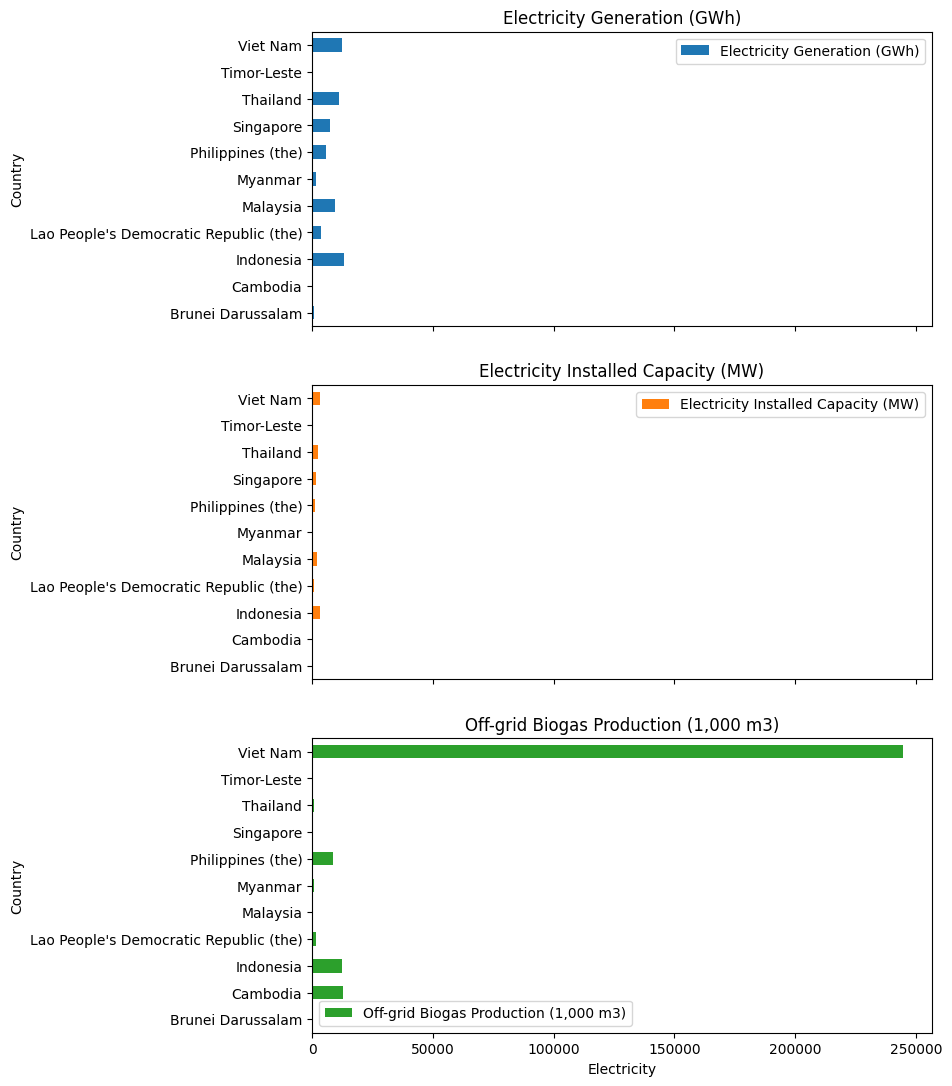

In [26]:
df2.plot(kind = 'barh', xlabel ='Electricity', ylabel = 'Country', subplots = True, figsize = (8,13))
legend = plt.legend()
for text in legend.get_texts():
    text.set_color('black')
plt.style.use('seaborn-v0_8-ticks')

In [27]:
df4 = df.groupby(['Country', 'Year']).mean(['Country', 'Year'])
df4.drop(columns = ['M49 code', 'Heat Generation (TJ)'])

Electricity Generation (GWh)  \
Country           Year                                 
Brunei Darussalam 2000                        938.80   
                  2001                        970.49   
                  2002                       1013.59   
                  2003                       1063.59   
                  2004                       1087.88   
...                                              ...   
Viet Nam          2019                      13408.22   
                  2020                      13870.93   
                  2021                      15327.81   
                  2022                      16175.98   
                  2023                           NaN   

                        Electricity Installed Capacity (MW)  \
Country           Year                                        
Brunei Darussalam 2000                               261.03   
                  2001                               245.80   
                  2002                               245.80   
                  2003                               250.80   
                  2004                               252.40   
...                                                     ...   
Viet Nam          2019                              3217.06   
                  2020                              4047.23   
                  2021                              4781.03   
                  2022                              4927.28   
                  2023                              5175.26   

                        Off-grid Biogas for Cooking (1,000 inhabitants)  \
Country           Year                                                    
Brunei Darussalam 2000                                              NaN   
                  2001                                              NaN   
                  2002                                              NaN   
                  2003                                              NaN   
                  2004                                              NaN   
...                                                                 ...   
Viet Nam          2019                                          1310.47   
                  2020                                          1309.70   
                  2021                                          1296.28   
                  2022                                          1257.64   
                  2023                                              NaN   

                        Off-grid Biogas Production (1,000 m3)  \
Country           Year                                          
Brunei Darussalam 2000                                    NaN   
                  2001                                    NaN   
                  2002                                    NaN   
                  2003                                    NaN   
                  2004                                    NaN   
...                                                       ...   
Viet Nam          2019                              321464.95   
                  2020                              322435.22   
                  2021                              320527.55   
                  2022                              311061.94   
                  2023                                    NaN   

                        Off-grid Electricity Access (1,000 inhabitants)  \
Country           Year                                                    
Brunei Darussalam 2000                                              NaN   
                  2001                                              NaN   
                  2002                                              NaN   
                  2003                                              NaN   
                  2004                                              NaN   
...                                                                 ...   
Viet Nam          2019                               

In [28]:
brunei_profile_df = df4.filter(like = 'Brunei Darussalam', axis = 0).drop(columns = ['M49 code', 'Heat Generation (TJ)', 'Off-grid Biogas for Cooking (1,000 inhabitants)', 'Off-grid Biogas Production (1,000 m3)', 'Off-grid Electricity Access (1,000 inhabitants)', 'Public Flows (2021 USD M)', 'SDG 7a1 Intl. Public Flows (2021 USD M)'])
brunei_profile_df

Electricity Generation (GWh)  \
Country           Year                                 
Brunei Darussalam 2000                        938.80   
                  2001                        970.49   
                  2002                       1013.59   
                  2003                       1063.59   
                  2004                       1087.88   
                  2005                       1087.92   
                  2006                       1099.45   
                  2007                       1131.60   
                  2008                       1141.16   
                  2009                       1203.82   
                  2010                        948.26   
                  2011                        931.15   
                  2012                        982.58   
                  2013                        990.87   
                  2014                        811.24   
                  2015                        840.02   
                  2016                        854.19   
                  2017                        692.89   
                  2018                        858.72   
                  2019                        890.05   
                  2020                        901.88   
                  2021                        890.31   
                  2022                        878.06   
                  2023                           NaN   

                        Electricity Installed Capacity (MW)  \
Country           Year                                        
Brunei Darussalam 2000                               261.03   
                  2001                               245.80   
                  2002                               245.80   
                  2003                               250.80   
                  2004                               252.40   
                  2005                               253.13   
                  2006                               253.00   
                  2007                               252.87   
                  2008                               253.67   
                  2009                               277.23   
                  2010                               222.29   
                  2011                               223.79   
                  2012                               229.29   
                  2013                               229.67   
                  2014                               184.32   
                  2015                               184.64   
                  2016                               184.64   
                  2017                               198.88   
                  2018                               201.44   
                  2019                               201.44   
                  2020                               204.58   
                  2021                               205.14   
                  2022                               205.15   
                  2023                               205.17   

                        SDG 7b1 RE capacity per capita (W/inhabitant)  
Country           Year                                                 
Brunei Darussalam 2000                                           0.00  
                  2001                                           0.00  
                  2002                                           0.00  
                  2003                                           0.00  
                  2004                                           0.00  
                  2005                                           0.00  
                  2006                                           0.00  
                  2007                                           0.00  
                  2008                                           0.00  
                  2009                                           0.00  
                  2010                                          

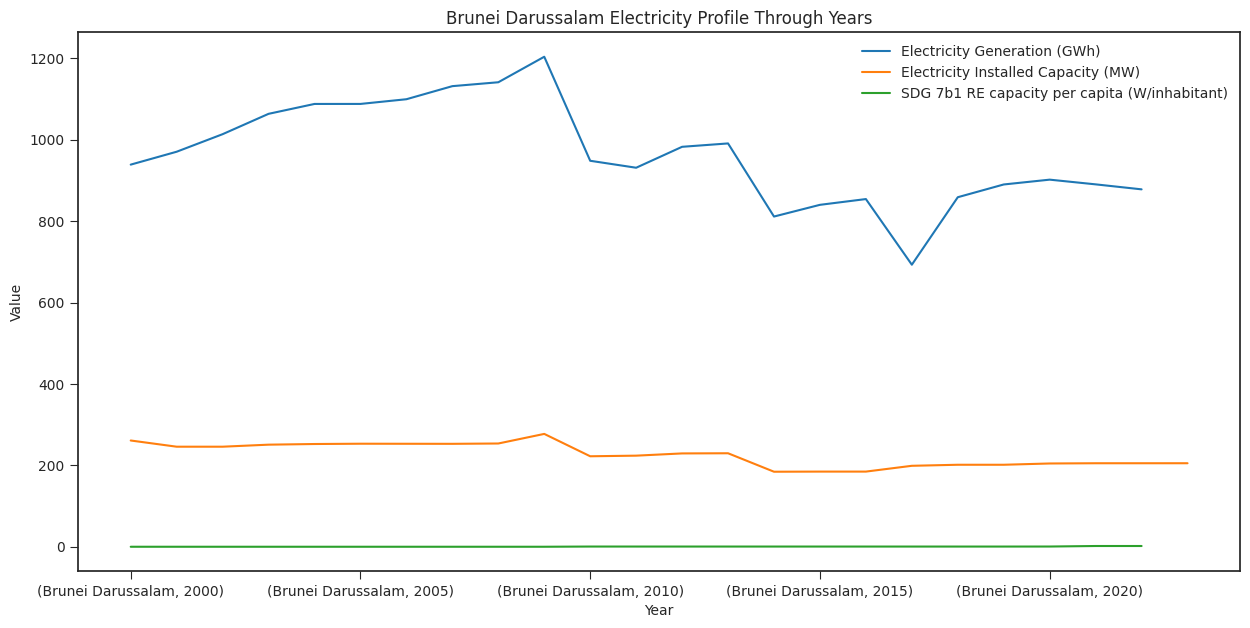

In [29]:
brunei_profile_df.plot(kind = 'line', title = 'Brunei Darussalam Electricity Profile Through Years', xlabel = 'Year', ylabel = 'Value', figsize = (15,7))
plt.style.use = 'bmh'

In [30]:
cambodia_profile_df = df4.filter(like = 'Cambodia', axis = 0).drop(columns = ['M49 code', 'Heat Generation (TJ)'])
cambodia_profile_df

Electricity Generation (GWh)  \
Country  Year                                 
Cambodia 2000                        188.38   
         2001                        185.09   
         2002                        184.20   
         2003                        212.45   
         2004                        247.92   
         2005                        220.04   
         2006                        181.41   
         2007                        193.28   
         2008                        186.60   
         2009                        124.68   
         2010                         98.17   
         2011                        115.78   
         2012                        132.46   
         2013                        151.60   
         2014                        261.21   
         2015                        380.88   
         2016                        463.92   
         2017                        559.40   
         2018                        688.75   
         2019                        730.16   
         2020                        722.11   
         2021                        817.04   
         2022                        849.61   
         2023                           NaN   

               Electricity Installed Capacity (MW)  \
Country  Year                                        
Cambodia 2000                                60.22   
         2001                                60.25   
         2002                                60.95   
         2003                                62.43   
         2004                                63.39   
         2005                                57.97   
         2006                                60.17   
         2007                                45.25   
         2008                                48.74   
         2009                                37.95   
         2010                                36.81   
         2011                                58.52   
         2012                                55.84   
         2013                               108.45   
         2014                               141.54   
         2015                               142.28   
         2016                               144.77   
         2017                               162.21   
         2018                               188.83   
         2019                               210.12   
         2020                               255.17   
         2021                               256.92   
         2022                               301.31   
         2023                               311.42   

               Off-grid Biogas for Cooking (1,000 inhabitants)  \
Country  Year                                                    
Cambodia 2000                                              NaN   
         2001                                              NaN   
         2002                                              NaN   
         2003                                              NaN   
         2004                                              NaN   
         2005                                              NaN   
         2006                                             1.46   
         2007                                             7.14   
         2008                                            18.70   
         2009                                            31.63   
         2010                                            50.12   
         2011                                            73.81   
         2012                                            93.96   
         2013                                            98.25   
         2014                                           105.94   
         2015                                           114.08   
         2016                                           124.38   
         2017                                           129.35   
         2018                                           130.80   
 

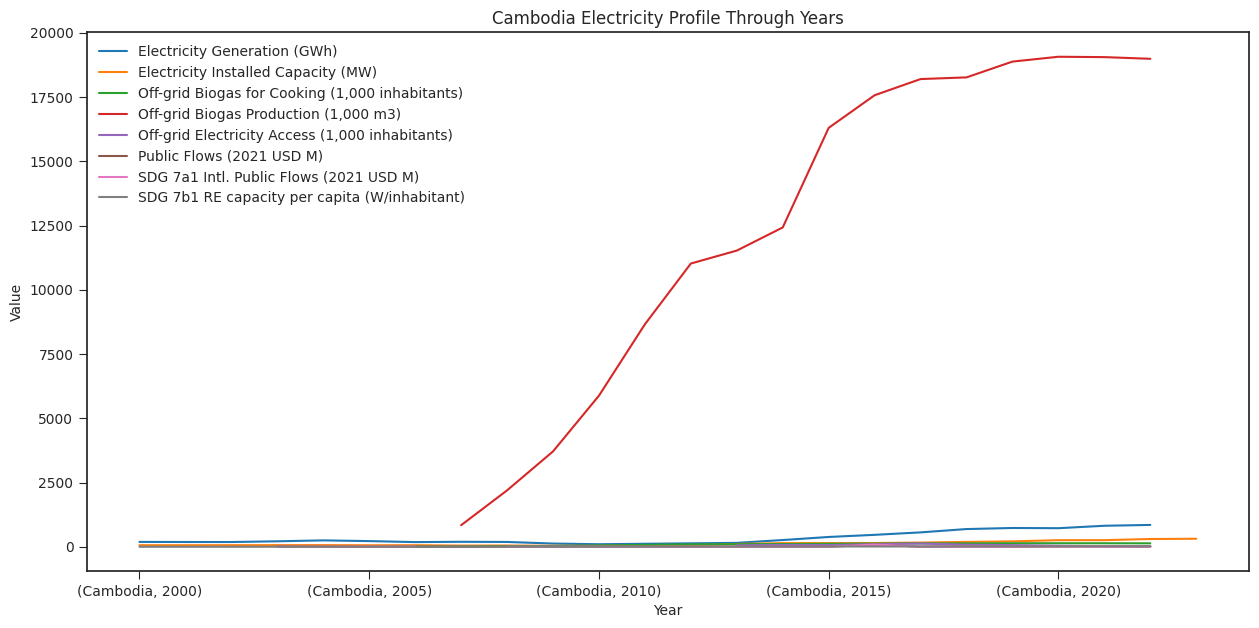

In [31]:
cambodia_profile_df.plot(kind = 'line', title = 'Cambodia Electricity Profile Through Years', xlabel = 'Year', ylabel = 'Value', figsize = (15,7))
plt.style.use = 'bmh'

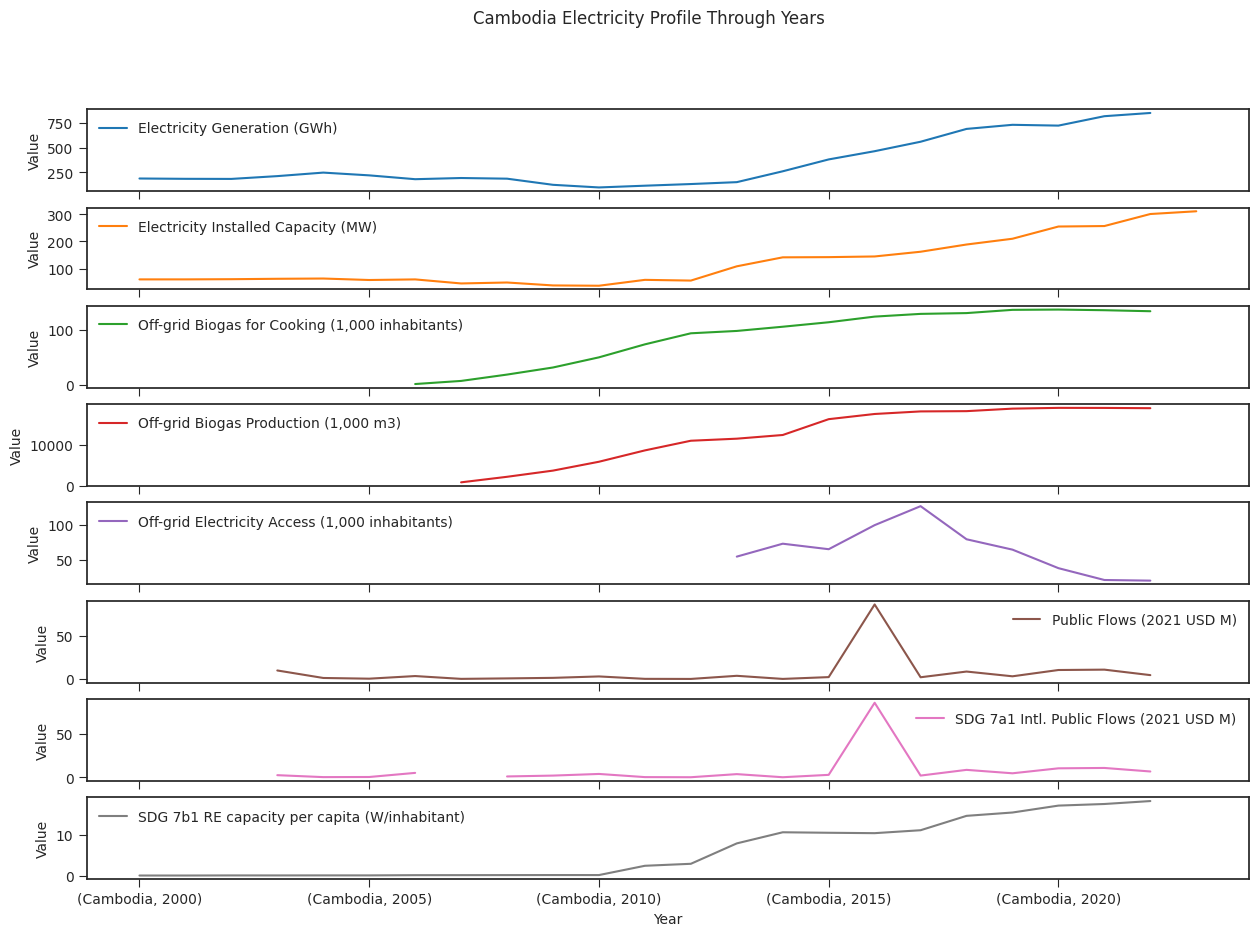

In [32]:
cambodia_profile_df.plot(kind = 'line', title = 'Cambodia Electricity Profile Through Years', xlabel = 'Year', ylabel = 'Value', subplots = True, figsize = (15,10))
plt.style.use = 'bmh'

In [33]:
indo_profile_df = df4.filter(like = 'Indonesia', axis = 0).drop(columns = [ 'M49 code','Heat Generation (TJ)'])
indo_profile_df

Electricity Generation (GWh)  \
Country   Year                                 
Indonesia 2000                       8912.25   
          2001                       9652.03   
          2002                      10277.92   
          2003                      10672.66   
          2004                      11344.77   
          2005                      12080.91   
          2006                      12545.51   
          2007                      11416.70   
          2008                      11137.33   
          2009                      11635.53   
          2010                      12683.53   
          2011                      11996.76   
          2012                      13065.36   
          2013                      13251.95   
          2014                      13202.12   
          2015                      13521.97   
          2016                      14315.70   
          2017                      14790.67   
          2018                      14940.51   
          2019                      15510.62   
          2020                      15302.35   
          2021                      16214.07   
          2022                      17462.81   
          2023                           NaN   

                Electricity Installed Capacity (MW)  \
Country   Year                                        
Indonesia 2000                              3458.03   
          2001                              2221.29   
          2002                              2024.97   
          2003                              2354.33   
          2004                              2471.15   
          2005                              2574.89   
          2006                              2800.17   
          2007                              2459.42   
          2008                              2506.56   
          2009                              2597.64   
          2010                              2565.19   
          2011                              2617.39   
          2012                              2952.20   
          2013                              3101.01   
          2014                              3045.57   
          2015                              3041.36   
          2016                              3248.54   
          2017                              3460.63   
          2018                              3248.00   
          2019                              3484.41   
          2020                              3638.34   
          2021                              3727.84   
          2022                              4412.78   
          2023                              4800.16   

                Off-grid Biogas for Cooking (1,000 inhabitants)  \
Country   Year                                                    
Indonesia 2000                                              NaN   
          2001                                              NaN   
          2002                                              NaN   
          2003                                              NaN   
          2004                                              NaN   
          2005                                              NaN   
          2006                                              NaN   
          2007                                              NaN   
          2008                                              NaN   
          2009                                             0.23   
          2010                                             6.09   
          2011                                            17.24   
          2012                                            29.61   
          2013                                            41.73   
          2014                                            52.70   
          2015                                            60.61   
          2016                                            71.97   
          2017                                            78.53

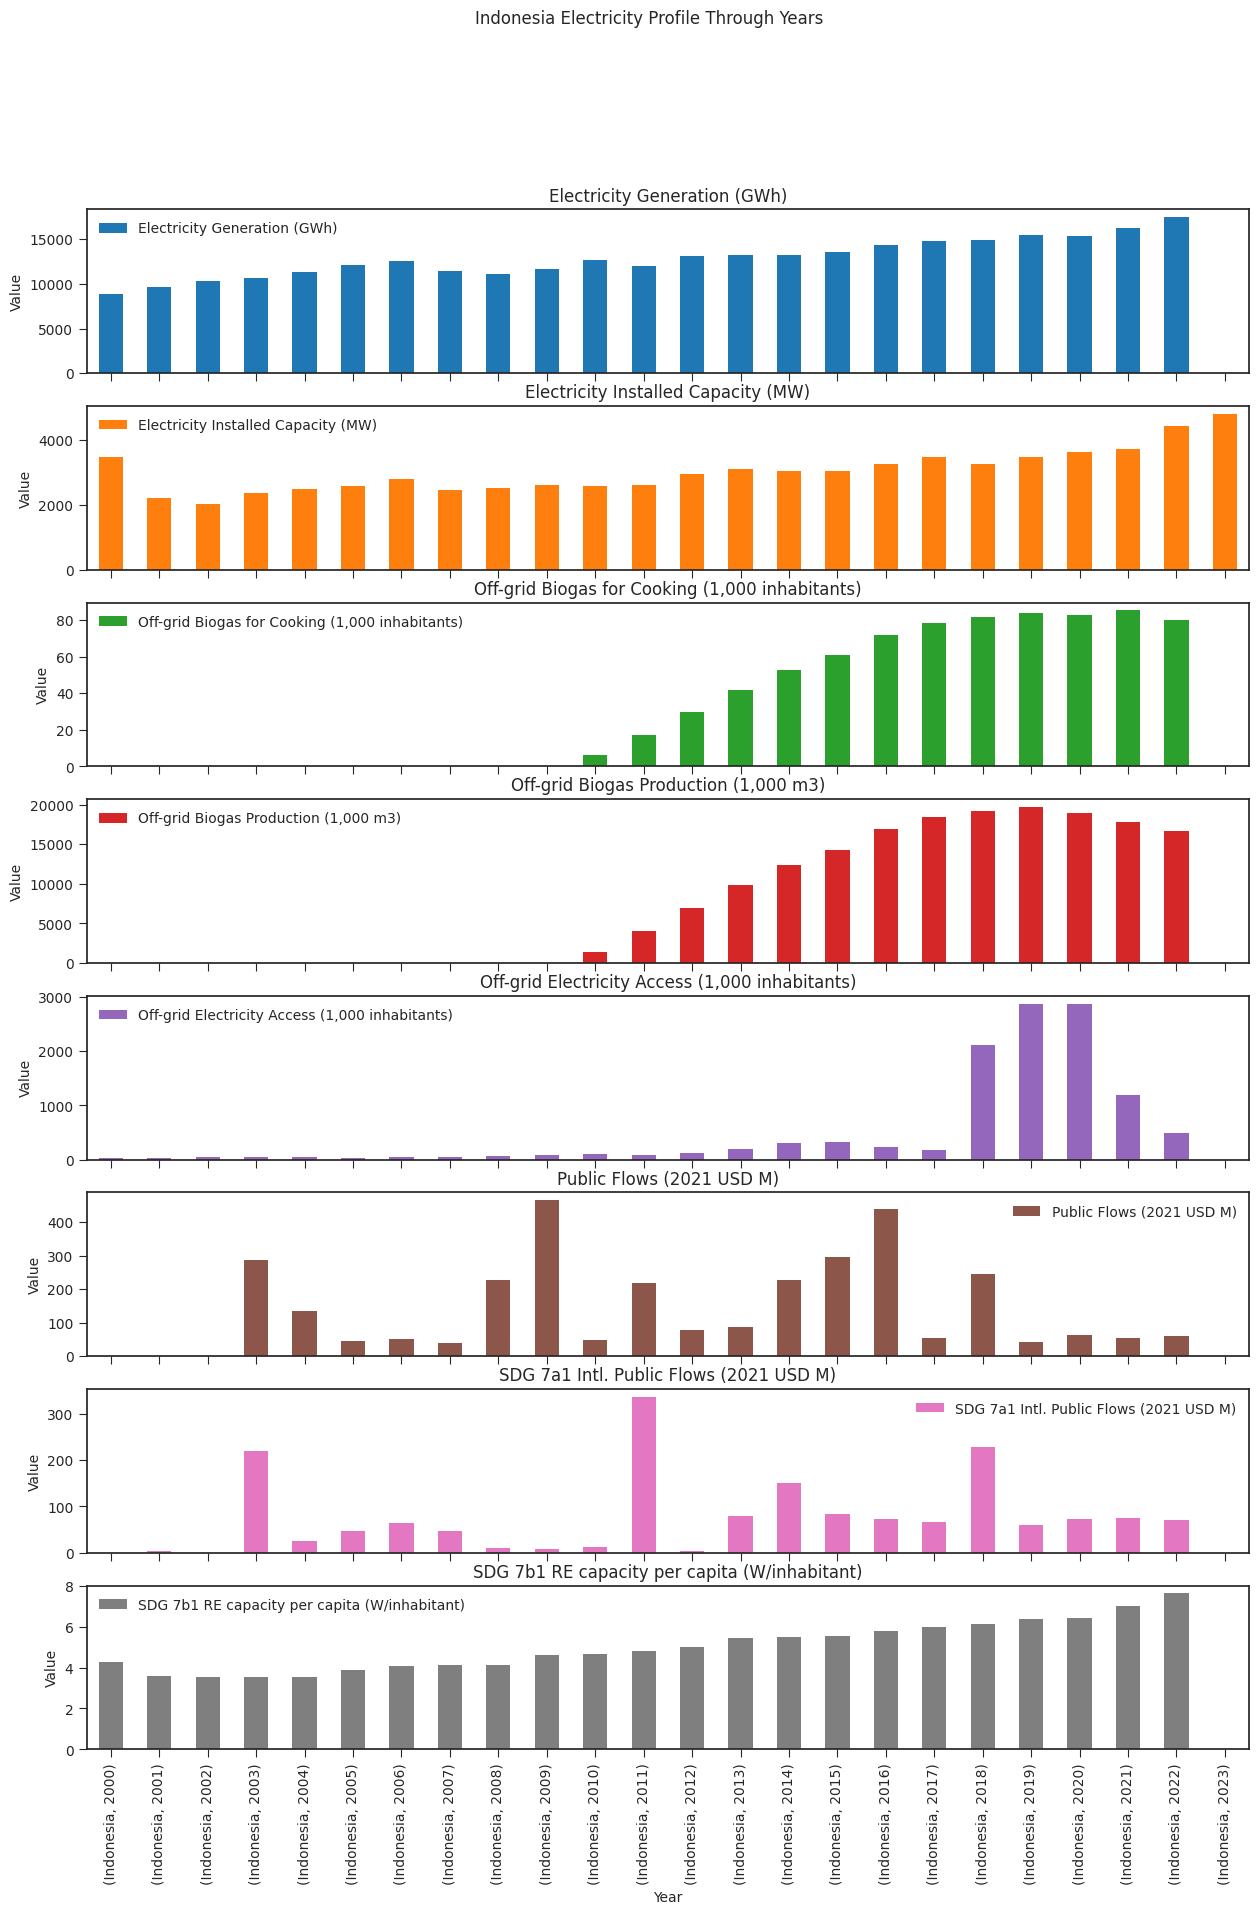

In [34]:
indo_profile_df.plot(kind = 'bar', title = 'Indonesia Electricity Profile Through Years', xlabel = 'Year', ylabel = 'Value', subplots = True, figsize = (15,20))
plt.style.use = 'bmh'

In [35]:
laos_profile_df = df4.filter(like = 'Lao', axis = 0).drop(columns = ['M49 code','Heat Generation (TJ)'])
laos_profile_df

Electricity Generation (GWh)  \
Country                                Year                                 
Lao People's Democratic Republic (the) 2000                       1843.60   
                                       2001                       1819.75   
                                       2002                       1738.60   
                                       2003                       1593.00   
                                       2004                       1677.45   
                                       2005                       1759.85   
                                       2006                       1201.97   
                                       2007                       1127.87   
                                       2008                       1242.72   
                                       2009                       1129.65   
                                       2010                       2114.38   
                                       2011                       3247.98   
                                       2012                       3192.26   
                                       2013                       3104.97   
                                       2014                       3160.76   
                                       2015                       2798.26   
                                       2016                       4188.34   
                                       2017                       5269.70   
                                       2018                       4323.85   
                                       2019                       3923.79   
                                       2020                       5029.71   
                                       2021                       5645.09   
                                       2022                       6415.85   
                                       2023                           NaN   

                                             Electricity Installed Capacity (MW)  \
Country                                Year                                        
Lao People's Democratic Republic (the) 2000                               339.82   
                                       2001                               340.42   
                                       2002                               340.51   
                                       2003                               340.59   
                                       2004                               340.70   
                                       2005                               361.39   
                                       2006                               180.70   
                                       2007                               180.70   
                                       2008                               180.73   
                                       2009                               468.48   
                                       2010                               517.80   
                                       2011                               518.74   
                                       2012                               600.54   
                                       2013                               508.06   
                                       2014                               555.54   
                                       2015                               812.43   
                                       2016                               937.77   
                                       2017                               971.90   
                                       2018                               798.95   
                                       2019                               892.71   
                                       2020                              1092.73   
                                       2021                              1199.03   
                          

<Axes: title={'center': 'Laos Electricity Installed Capacoty and Generation Profile'}, xlabel='Electricity Generation (GWh)', ylabel='Electricity Installed Capacity (MW)'>

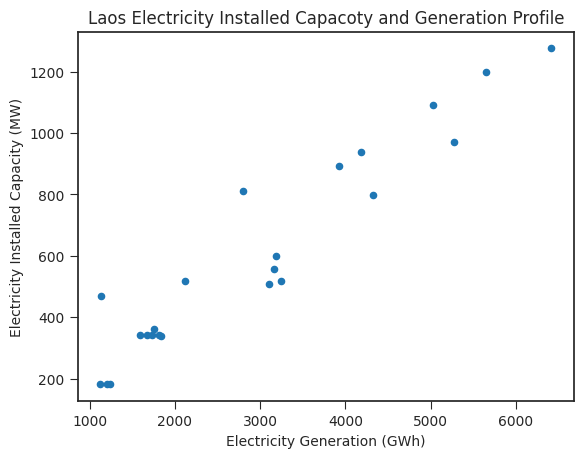

In [36]:
laos_profile_df.plot.scatter (x = 'Electricity Generation (GWh)', y = 'Electricity Installed Capacity (MW)', title = 'Laos Electricity Installed Capacoty and Generation Profile')

In [37]:
malay_profile_df = df4.filter(like = 'Malaysia', axis = 0)
malay_profile_df.drop(columns =['Heat Generation (TJ)', 'Off-grid Biogas for Cooking (1,000 inhabitants)', 'Off-grid Biogas Production (1,000 m3)'])

M49 code  Electricity Generation (GWh)  \
Country  Year                                           
Malaysia 2000    458.00                       8106.49   
         2001    458.00                       7811.57   
         2002    458.00                       8304.02   
         2003    458.00                       7777.38   
         2004    458.00                       8363.77   
         2005    458.00                       8602.92   
         2006    458.00                       9121.73   
         2007    458.00                       8752.74   
         2008    458.00                       9098.33   
         2009    458.00                       8515.78   
         2010    458.00                       8007.94   
         2011    458.00                       8408.70   
         2012    458.00                       8924.55   
         2013    458.00                       9388.35   
         2014    458.00                       9561.91   
         2015    458.00                       9108.61   
         2016    458.00                       9886.68   
         2017    458.00                      10015.15   
         2018    458.00                      10557.34   
         2019    458.00                      10948.99   
         2020    458.00                      10717.33   
         2021    458.00                      10719.26   
         2022    458.00                      10719.42   
         2023    458.00                           NaN   

               Electricity Installed Capacity (MW)  \
Country  Year                                        
Malaysia 2000                              1997.50   
         2001                              1920.05   
         2002                              1903.23   
         2003                              1929.88   
         2004                              2050.88   
         2005                              2058.96   
         2006                              2106.46   
         2007                              1953.23   
         2008                              1954.90   
         2009                              1882.37   
         2010                              1680.65   
         2011                              1781.86   
         2012                              1811.86   
         2013                              1906.14   
         2014                              1847.67   
         2015                              1839.52   
         2016                              1828.46   
         2017                              1945.32   
         2018                              1955.98   
         2019                              2136.30   
         2020                              2172.12   
         2021                              2276.56   
         2022                              2334.68   
         2023                              2334.68   

               Off-grid Electricity Access (1,000 inhabitants)  \
Country  Year                                                    
Malaysia 2000                                              NaN   
         2001                                             0.17   
         2002                                             0.17   
         2003                                             0.17   
         2004                                             0.31   
         2005                                             0.40   
         2006                                             0.40   
         2007                                             0.40   
         2008                                             0.83   
         2009                                             0.91   
         2010                                             1.34   
         2011                                             1.34   
         2012                                             1.34   
         2013                                             1.42   
         2014                                             1.75   
     

<Axes: title={'center': 'Malaysia Electricity Profile Through Years'}, xlabel='Country,Year'>

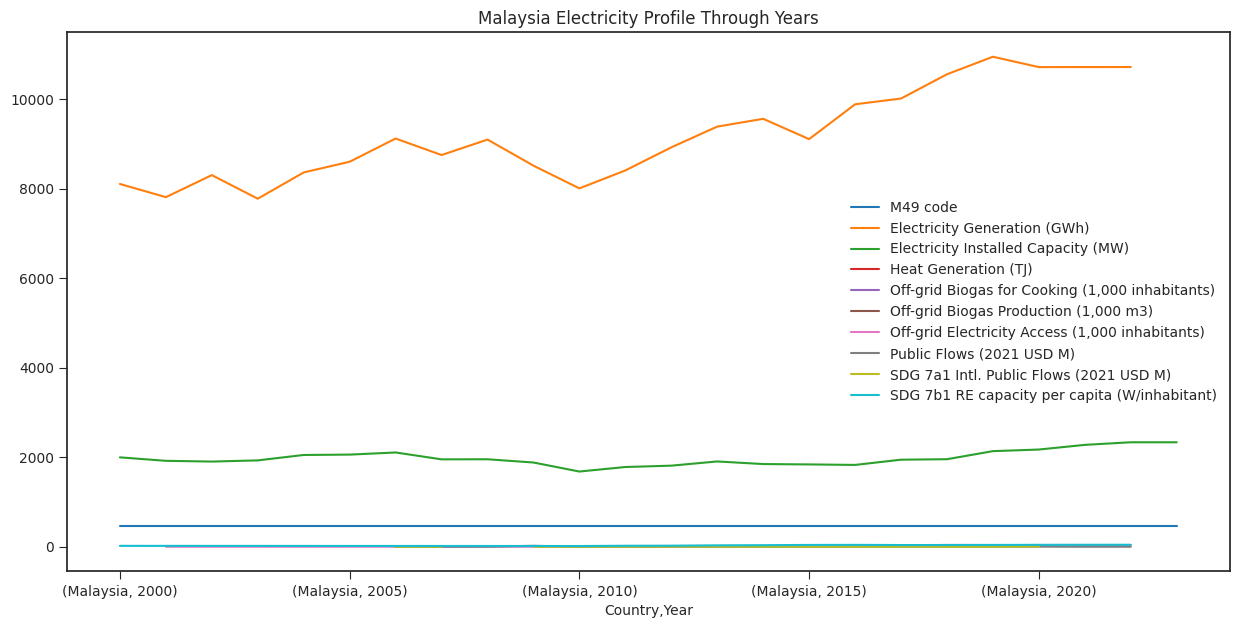

In [38]:
malay_profile_df.plot (kind = 'line', title = 'Malaysia Electricity Profile Through Years', figsize = (15,7))

In [39]:
myanmar_profile_df = df4.filter(like = 'Myanmar', axis = 0).drop(columns = ['M49 code', 'Heat Generation (TJ)'])
myanmar_profile_df

Electricity Generation (GWh)  \
Country Year                                 
Myanmar 2000                       1047.61   
        2001                        966.70   
        2002                       1039.78   
        2003                       1113.28   
        2004                        959.43   
        2005                        887.45   
        2006                        904.49   
        2007                        824.80   
        2008                        852.94   
        2009                        895.33   
        2010                       1102.14   
        2011                       1183.45   
        2012                       1240.60   
        2013                       1661.65   
        2014                       1762.23   
        2015                       1751.78   
        2016                       2050.82   
        2017                       1706.60   
        2018                       1881.17   
        2019                       1834.91   
        2020                       1891.60   
        2021                       1883.38   
        2022                       1749.90   
        2023                           NaN   

              Electricity Installed Capacity (MW)  \
Country Year                                        
Myanmar 2000                               214.09   
        2001                               221.69   
        2002                               227.27   
        2003                               209.70   
        2004                               264.78   
        2005                               235.65   
        2006                               239.85   
        2007                               214.83   
        2008                               232.88   
        2009                               321.17   
        2010                               429.51   
        2011                               401.10   
        2012                               416.48   
        2013                               460.51   
        2014                               519.76   
        2015                               502.67   
        2016                               515.62   
        2017                               444.24   
        2018                               482.09   
        2019                               463.94   
        2020                               547.94   
        2021                               496.22   
        2022                               510.91   
        2023                               510.91   

              Off-grid Biogas for Cooking (1,000 inhabitants)  \
Country Year                                                    
Myanmar 2000                                              NaN   
        2001                                              NaN   
        2002                                              NaN   
        2003                                              NaN   
        2004                                              NaN   
        2005                                              NaN   
        2006                                              NaN   
        2007                                              NaN   
        2008                                              NaN   
        2009                                             0.11   
        2010                                             0.11   
        2011                                             0.11   
        2012                                             1.11   
        2013                                             1.11   
        2014                                             1.09   
        2015                                             1.09   
        2016                                             1.09   
        2017                                             0.94   
        2018                                             0.94   
        2019                                             0.90   
        

In [40]:
myanmar_profile_df.corr()

,Electricity Generation (GWh),Electricity Installed Capacity (MW),"Off-grid Biogas for Cooking (1,000 inhabitants)","Off-grid Biogas Production (1,000 m3)","Off-grid Electricity Access (1,000 inhabitants)",Public Flows (2021 USD M),SDG 7a1 Intl. Public Flows (2021 USD M),SDG 7b1 RE capacity per capita (W/inhabitant)
Electricity Generation (GWh),1.00,0.91,0.75,0.83,0.63,-0.27,-0.28,0.89
Electricity Installed Capacity (MW),0.91,1.00,0.64,0.79,0.74,-0.51,-0.51,0.97
"Off-grid Biogas for Cooking (1,000 inhabitants)",0.75,0.64,1.00,1.00,0.29,0.31,0.30,0.72
"Off-grid Biogas Production (1,000 m3)",0.83,0.79,1.00,1.00,0.32,0.32,0.30,0.83
"Off-grid Electricity Access (1,000 inhabitants)",0.63,0.74,0.29,0.32,1.00,-0.39,-0.38,0.74
Public Flows (2021 USD M),-0.27,-0.51,0.31,0.32,-0.39,1.00,1.00,-0.46
SDG 7a1 Intl. Public Flows (2021 USD M),-0.28,-0.51,0.30,0.30,-0.38,1.00,1.00,-0.46
SDG 7b1 RE capacity per capita (W/inhabitant),0.89,0.97,0.72,0.83,0.74,-0.46,-0.46,1.00


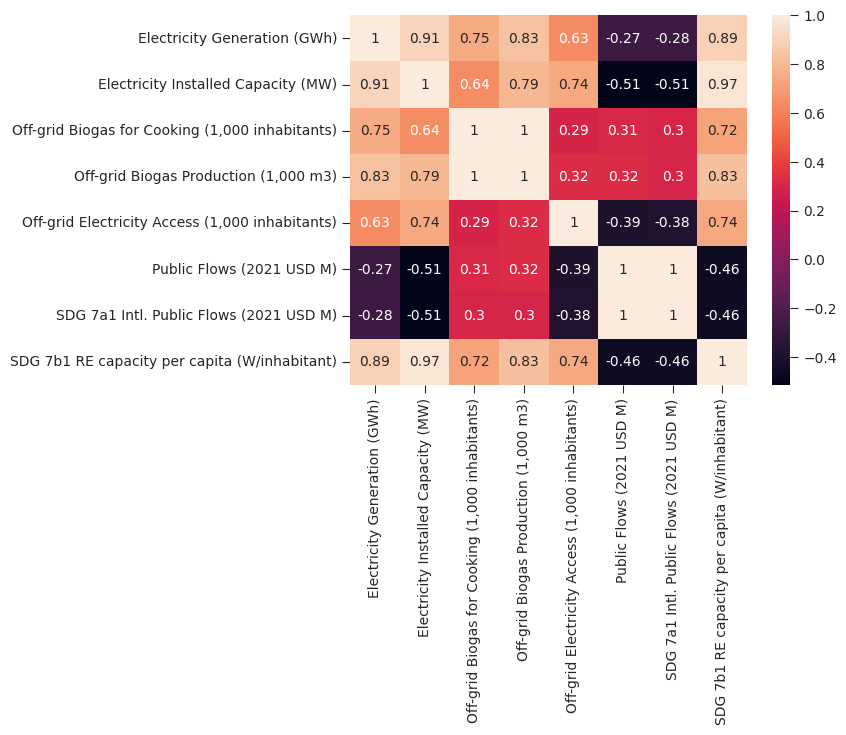

In [41]:
# Multiple Variables Correlation of Myanmar Electricity Profile
sns.heatmap(myanmar_profile_df.corr(numeric_only = True), annot = True)
plt.rcParams['figure.figsize'] = (10,7)
plt.show()

In [42]:
# ['Brunei Darussalam', 'Cambodia', 'Indonesia', "Lao People's Democratic Republic (the)", 'Malaysia', 'Myanmar', 'Philippines (the)', 'Singapore', 'Thailand', 'Timor-Leste', 'Viet Nam']